In [ ]:
#Classification of CIFAR-10 dataset

In [ ]:
# Import Required Libraries
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define Paths and Parameters
dataset_path = '/content/drive/My Drive/MiniProject Weed Detection/Using-dataset-2/CNN-DataSets2'  # Adjust this path
base_dir = '/content/dataset'
# base_dir = '/content/dataset/train'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
img_width, img_height = 150, 150
batch_size = 32
epochs = 10
split_size = 0.2

In [ ]:
# Create training and testing directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
# Function to split data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  for category in os.listdir(SOURCE):
        category_path = os.path.join(SOURCE, category)
        files = os.listdir(category_path)
        files = [os.path.join(category_path, f) for f in files]
        train_files, test_files = train_test_split(files, test_size=SPLIT_SIZE, random_state=42)

        train_category_path = os.path.join(TRAINING, category)
        test_category_path = os.path.join(TESTING, category)

        os.makedirs(train_category_path, exist_ok=True)
        os.makedirs(test_category_path, exist_ok=True)

        for f in train_files:
            shutil.copy(f, train_category_path)
        for f in test_files:
            shutil.copy(f, test_category_path)

split_data(dataset_path, train_dir, test_dir, split_size)

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training and testing data generators
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')

Found 300 images belonging to 2 classes.
Found 76 images belonging to 2 classes.


In [ ]:

# keras imports for the dataset and building our neural network
from keras.datasets import mnist

import numpy as np
#from tensorflow.keras.models import Sequential  from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
#from tensorflow.keras.utils import np_utils

In [ ]:
from keras.layers import Input
from keras.layers import Dense, Flatten
from keras.models import Model
#import tensorflow_addons as tfa
import tensorflow as tf
# Build the Feed-Forward Neural Network
# Build the Feed-Forward Neural Network
model = Sequential([
    tf.keras.layers.Flatten(input_shape=(img_width, img_height, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification
])

In [ ]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer=tf.keras.optimizers.Adam(lr=0.001))

In [ ]:
# Train the Model
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs, validation_data=test_generator, validation_steps=test_generator.samples // batch_size)

# Evaluate the Model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
9/9 [==============================] - 21s 2s/step - loss: 0.8073 - accuracy: 0.5560 - val_loss: 0.6562 - val_accuracy: 0.6719
Epoch 2/10
9/9 [==============================] - 17s 2s/step - loss: 0.6524 - accuracy: 0.6597 - val_loss: 0.6948 - val_accuracy: 0.5938
Epoch 3/10
9/9 [==============================] - 15s 2s/step - loss: 0.6682 - accuracy: 0.6381 - val_loss: 0.7972 - val_accuracy: 0.5938
Epoch 4/10
9/9 [==============================] - 17s 2s/step - loss: 0.6647 - accuracy: 0.6455 - val_loss: 0.6540 - val_accuracy: 0.6406
Epoch 5/10
9/9 [==============================] - 17s 2s/step - loss: 0.5901 - accuracy: 0.6632 - val_loss: 0.7045 - val_accuracy: 0.6250
Epoch 6/10
9/9 [==============================] - 19s 2s/step - loss: 0.5848 - accuracy: 0.6903 - val_loss: 0.6385 - val_accuracy: 0.6406
Epoch 7/10
9/9 [==============================] - 15s 2s/step - loss: 0.5530 - accuracy: 0.7239 - val_loss: 0.7424 - val_accuracy: 0.6250
Epoch 8/10
9/9 [==================

In [ ]:
import numpy as np
predictions = (model.predict(test_generator) > 0.5).astype("int32")
labels = test_generator.classes
classes = [category for category in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, category))]

3/3 [==============================] - 2s 632ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels, predictions, target_names=classes))

              precision    recall  f1-score   support

        test       0.33      0.22      0.27        27
       train       0.64      0.76      0.69        49

    accuracy                           0.57        76
   macro avg       0.49      0.49      0.48        76
weighted avg       0.53      0.57      0.54        76



In [ ]:
classes = []
for i in os.listdir(dataset_path):
    classes+=[i]

classes

['test', 'train']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels, predictions, target_names=classes))

              precision    recall  f1-score   support

        test       0.33      0.22      0.27        27
       train       0.64      0.76      0.69        49

    accuracy                           0.57        76
   macro avg       0.49      0.49      0.48        76
weighted avg       0.53      0.57      0.54        76



In [ ]:
y_pred_proba = model.predict(test_generator)

3/3 [==============================] - 4s 1s/step


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
# Assuming your positive class is represented by 1
y_pred_proba_positive = y_pred_proba[:, 0]

fpr, tpr, thresholds = roc_curve(labels, y_pred_proba_positive)
roc_auc = auc(fpr, tpr)

# ... rest of your ROC curve plotting code ...

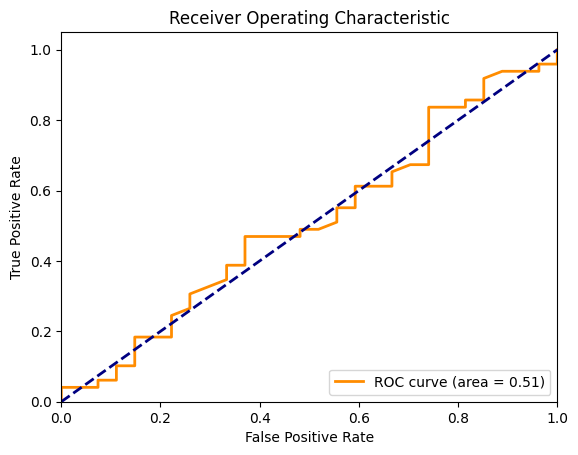

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install scikit-learn==1.2.2

In [ ]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(labels, predictions)
print(f"Cohen's kappa: {kappa}")

Cohen's kappa: -0.024509803921568762


3/3 [==============================] - 6s 2s/step


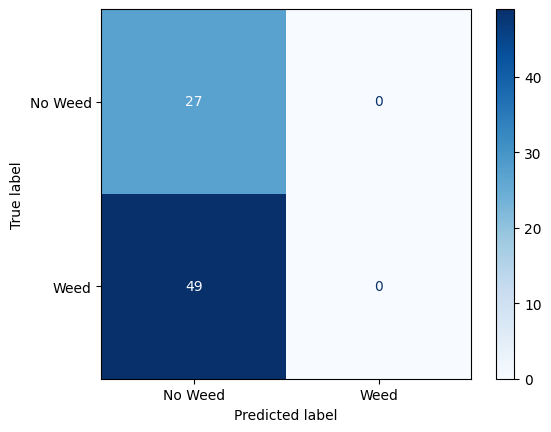

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# True labels and predictions
true_labels = test_generator.classes
predictions = np.argmax(model.predict(test_generator), axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Weed', 'Weed'])
disp.plot(cmap='Blues')
plt.show()


In [ ]:
# Save the model to model.h5
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Define the folder path
folder_path = '/content/drive/My Drive/models/'  # Replace with your desired folder path

# Create the folder if it doesn't exist
import os
os.makedirs(folder_path, exist_ok=True)

# Save the model
model.save(os.path.join(folder_path, 'model.h5'))